In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available()) 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the neural network class
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # Input (784) to hidden (128)
        self.fc2 = nn.Linear(128, 10)   # Hidden (128) to output (10)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten 28x28 images
        x = F.relu(self.fc1(x))  # ReLU activation
        x = self.fc2(x)  # Raw logits
        return x  # CrossEntropyLoss applies softmax internally

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define data transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Load MNIST datasets
trainset = datasets.MNIST('data', train=True, download=True, transform=transform)
testset = datasets.MNIST('data', train=False, download=True, transform=transform)

# Create data loaders
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Initialize model, loss, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()  # Clear gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")

In [ ]:
import matplotlib.pyplot as plt

# Test the model
model.eval()  # Set to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # Disable gradient computation
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Visualize predictions
dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Plot 9 images
fig = plt.figure(figsize=(10, 10))
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    ax.imshow(images[i].view(28, 28), cmap='gray')
    ax.set_title(f"Pred: {predicted[i]}, True: {labels[i]}")
    ax.axis('off')
plt.show()

In [ ]:
import torch

# Create tensors
tensor_list = torch.tensor([1, 2, 3])  # From a list
zeros_tensor = torch.zeros(2, 3)       # 2x3 tensor of zeros
ones_tensor = torch.ones(2, 3)         # 2x3 tensor of ones
random_tensor = torch.rand(2, 3)       # 2x3 random tensor

# Basic operations
sum_tensor = tensor_list + 1           # Add scalar
product_tensor = tensor_list * 2       # Multiply by scalar
matmul_result = torch.matmul(ones_tensor, random_tensor.t())  # Matrix multiplication

# Reshape tensor
reshaped_tensor = tensor_list.view(3, 1)  # Reshape to 3x1

# Move to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tensor_gpu = tensor_list.to(device)

print("Tensor from list:", tensor_list)
print("Zeros tensor:", zeros_tensor)
print("Matrix multiplication:", matmul_result)
print("Reshaped tensor:", reshaped_tensor)

In [ ]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor(2.0, requires_grad=True)

# Define a simple function
y = x ** 2 + 3 * x + 1

# Compute gradients
y.backward()

# Print gradient (dy/dx = 2x + 3, at x=2, gradient = 7)
print("Gradient of y with respect to x:", x.grad)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define a neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(4, 10)  # Input: 4 features, Output: 10 units
        self.fc2 = nn.Linear(10, 3)  # Output: 3 classes (iris dataset)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))  # ReLU activation
        x = self.fc2(x)          # Output logits
        return x

# Instantiate and test the model
model = SimpleNN()
sample_input = torch.rand(1, 4)  # Batch of 1, 4 features
output = model(sample_input)
print("Model output shape:", output.shape)  # Should be [1, 3]

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load and preprocess iris dataset
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create datasets and loaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define model, loss, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Move to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}')

# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy = correct / total
print(f'Test Accuracy: {accuracy:.2f}')

# Save the model
torch.save(model.state_dict(), 'iris_model.pth')

In [1]:
import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load a sample review
review = movie_reviews.raw(movie_reviews.fileids('pos')[0])

# Tokenize
words = word_tokenize(review)

# Remove stop words and punctuation
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word not in string.punctuation]

# Lemmatize
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

print("Original Review (first 100 chars):", review[:100])
print("Filtered Words:", filtered_words[:10])
print("Lemmatized Words:", lemmatized_words[:10])

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\khaai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khaai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khaai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\khaai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original Review (first 100 chars): films adapted from comic books have had plenty of success , whether they're about superheroes ( batm
Filtered Words: ['films', 'adapted', 'comic', 'books', 'plenty', 'success', 'whether', "'re", 'superheroes', 'batman']
Lemmatized Words: ['film', 'adapted', 'comic', 'book', 'plenty', 'success', 'whether', "'re", 'superheroes', 'batman']


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import movie_reviews

# Load reviews and labels
pos_ids = movie_reviews.fileids('pos')
neg_ids = movie_reviews.fileids('neg')
reviews = [movie_reviews.raw(fileid) for fileid in pos_ids] + [movie_reviews.raw(fileid) for fileid in neg_ids]
labels = [1] * len(pos_ids) + [0] * len(neg_ids)

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(reviews)

print("Vocabulary (first 10):", vectorizer.get_feature_names_out()[:10])
print("TF-IDF Matrix Shape:", X.shape)
print("Sample TF-IDF Vector (first review, first 10 features):", X[0].toarray()[0][:10])

Vocabulary (first 10): ['000' '10' '100' '11' '12' '13' '13th' '14' '15' '16']
TF-IDF Matrix Shape: (2000, 5000)
Sample TF-IDF Vector (first review, first 10 features): [0.         0.         0.         0.         0.04617946 0.
 0.         0.         0.         0.        ]


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Train classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7925


Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.83      0.80       201
    Positive       0.81      0.76      0.78       199

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



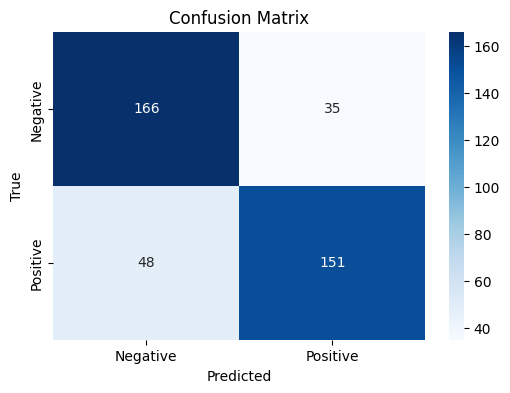

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()